<a href="https://colab.research.google.com/github/sneezedsherry/DataVisualization/blob/master/Tree_map_%26categoricaldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#When I tried to use catplot, I found that my seaborn didn't have this kind of plot, so I have to update it and restart the colab. 
!pip install seaborn==0.9.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#When I searched for python treemap, squarify came to me which seems work.
!pip install -q squarify
import squarify
#import matplotlib.colors as colors

In [0]:
downloaded = drive.CreateFile({'id':'1s04DN96LISkHZ97e2_1pLbRxglhKx_CZ'}) 
downloaded.GetContentFile('MusicSales2.csv') 

In [0]:
df = pd.read_csv('MusicSales2.csv')

In [0]:
#pick up the data we need
ms1 = df[(df.Region== 'Asia') | (df.Region == 'Europe')].loc[: , ['Country','Quantity','UnitPrice','Region']]
ms1.head()

,Country,Quantity,UnitPrice,Region
0,Germany,4,0.99,Europe
1,Germany,4,0.99,Europe
2,Norway,1,0.99,Europe
3,Norway,2,0.99,Europe
4,Norway,2,0.99,Europe


In [0]:
ms1['Q*U'] = ms1.Quantity * ms1.UnitPrice
ms1.head()

,Country,Quantity,UnitPrice,Region,Q*U
0,Germany,4,0.99,Europe,3.96
1,Germany,4,0.99,Europe,3.96
2,Norway,1,0.99,Europe,0.99
3,Norway,2,0.99,Europe,1.98
4,Norway,2,0.99,Europe,1.98


In [0]:
# I don't know how to calculate the percentage in one colum without first calculating the sum, so I just use this stupid way.
total_sales = ms1['Q*U'].sum()
total_sales

3415.35

In [0]:
ms2 = ms1.groupby(['Country','Region'], as_index = False).sum()
ms2['Percent'] = ms2['Q*U']/total_sales
ms2.sort_values(by=['Percent'], ascending=False, inplace=True)
ms2.head()

,Country,Region,Quantity,UnitPrice,Q*U,Percent
5,France,Europe,550,193.12,562.50,0.164698
6,Germany,Europe,412,146.58,421.88,0.123525
17,United Kingdom,Europe,305,109.89,301.95,0.088410
2,Czech Republic,Europe,228,88.26,269.72,0.078973
8,India,Asia,209,71.30,210.91,0.061754


(0.0, 100.0, 0.0, 100.0)

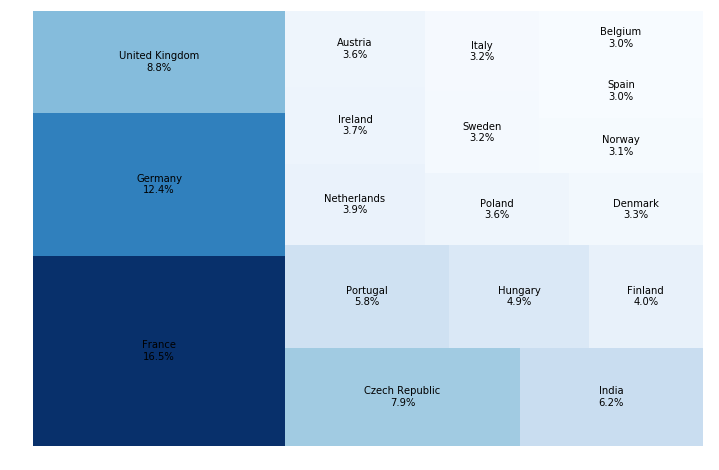

In [0]:

#labels = ["%s\n%d" % (label) for label in zip(temp2.index, temp2.aisle_department, temp2.products_department)]

#labels = ms2.Country
f, ax = plt.subplots(figsize=(12, 8))

#Label and color part are two of the most difficult part for me, and I searched on this website to get some hint
# https://python-graph-gallery.com/202-treemap-with-colors-mapped-on-values/
 

labels = ["%s\n%.1f%%" % (label) for label in zip(ms2.Country, ms2.Percent * 100 )]
cmap = plt.cm.Blues
mini=min(ms2.Percent)
maxi=max(ms2.Percent)
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(p)) for p in ms2.Percent]
ax = squarify.plot(sizes=ms2.Percent, label = labels , alpha = 1, color=colors)
ax.axis('off')


##My Question is: 
##What are the top3 popular genres in each of the regions?

In [0]:
ms3 = df.groupby(['Region','Genre'], as_index = False).sum().sort_values(by=['Region','Quantity'], ascending=False).groupby('Region').head(3)
ms3

,Region,Genre,Sales,CustomerID,InvoiceID,Milliseconds,Number of Records,Quantity,UnitPrice
75,South America,Rock,280.17,1738,19482,25323722,96,283,95.04
70,South America,Latin,175.23,1368,16344,14732848,66,177,65.34
71,South America,Metal,73.26,665,4206,7102054,24,74,23.76
62,Oceania,Rock,44.55,990,2919,5449501,18,45,17.82
60,Oceania,Metal,15.84,385,1198,2234589,7,16,6.93
59,Oceania,Latin,4.95,110,478,492956,2,5,1.98
51,North America,Rock,742.50,5956,52924,72199022,251,750,248.49
46,North America,Latin,441.54,3336,27212,34164304,143,446,141.57
47,North America,Metal,296.01,2183,22577,32213293,103,299,101.97
27,Europe,Rock,1204.83,13708,85505,114192233,406,1217,401.94


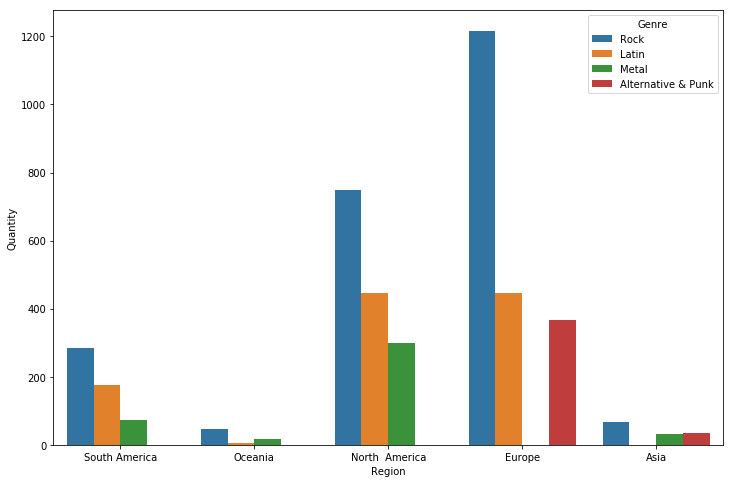

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Region", y="Quantity", hue="Genre", data=ms3)

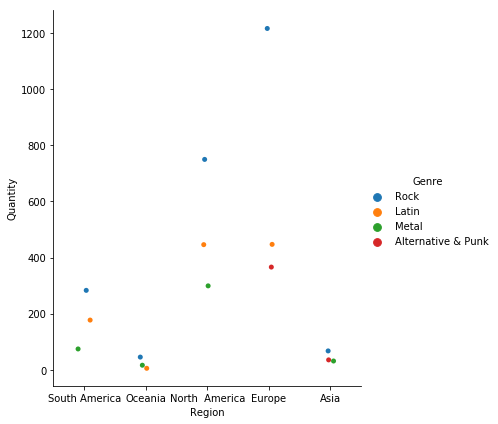

In [0]:
sns.catplot(x="Region", y="Quantity", hue="Genre", data=ms3, height=6, aspect=0.9)

From the plot we can figure out that rock is the most popular Genre in all regions, and Latin, Metal and Alternative & Punk are popular too.